In [1]:
import nnm_coordinate
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d

Using TensorFlow backend.


In [2]:
filename = '1gzc'
test_size = 0.2
seed = 50

In [3]:
[X, Y] = nnm_coordinate.load_csv(filename)

In [4]:
[X_train, X_test, y_train, y_test] = nnm_coordinate.validation_split(filename, 
                                                                     test_size, 
                                                                     seed)

In [5]:
[history, prediction] = nnm_coordinate.run_model(filename)

In [6]:
df = nnm_coordinate.validation_coord(filename)

In [7]:
df

,X pred,Y pred,Z pred,X test,Y test,Z test
0,82.167061,34.110500,45.275719,84.019997,35.375000,46.873001
1,61.114697,25.380234,33.675575,75.013000,24.063000,26.841000
2,80.974525,33.615860,44.618668,81.957001,21.066000,51.951000
3,81.378326,33.783596,44.841019,69.182999,49.839001,42.970001
4,69.554146,28.879997,38.325836,57.014999,31.281000,48.679001
...,...,...,...,...,...,...
424,79.398880,32.962818,43.750263,67.305000,53.268002,36.326000
425,77.279114,32.083271,42.582520,78.351997,17.410999,54.674999
426,78.647034,32.650833,43.336098,82.894997,37.979000,37.626999
427,65.691269,27.278301,36.197220,56.817001,40.330002,31.370001


In [8]:
nnm_coordinate.get_mse(filename)

final MSE for train is 84.50 and for validation is 86.63


In [9]:
[X_pred, Y_pred, Z_pred, X_real, Y_real, Z_real] = [df['X pred'],
                                                    df['Y pred'],
                                                    df['Z pred'],
                                                    df['X test'],
                                                    df['Y test'],
                                                    df['Z test']]

In [10]:
min_val = min(min(X_pred), min(Y_pred), min(Z_pred), min(X_real),min(Y_real), min(Z_real))
max_val = max(max(X_pred), max(Y_pred), max(Z_pred), max(X_real),max(Y_real), max(Z_real))

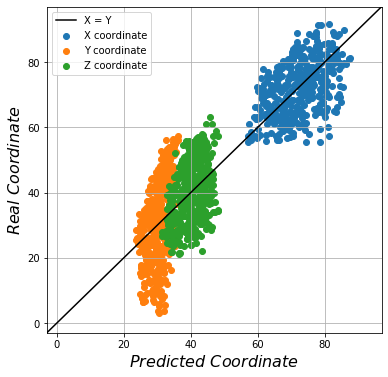

In [11]:
plt.figure(figsize=(6, 6))
plt.subplot()
plt.plot(np.linspace(math.floor(min_val) - 5, math.ceil(max_val) + 5, 1001),
         np.linspace(math.floor(min_val) - 5, math.ceil(max_val) + 5, 1001), 
         color='black', 
         label='X = Y')
plt.scatter(X_pred, X_real, label='X coordinate')
plt.scatter(Y_pred, Y_real, label='Y coordinate')
plt.scatter(Z_pred, Z_real, label='Z coordinate')
plt.xlabel('$Predicted$ $Coordinate$', fontsize='16')
plt.ylabel('$Real$ $Coordinate$', fontsize='16')
plt.xlim([math.floor(min_val) - 5, math.ceil(max_val) + 5])
plt.ylim([math.floor(min_val) - 5, math.ceil(max_val) + 5])
plt.legend()
plt.grid()

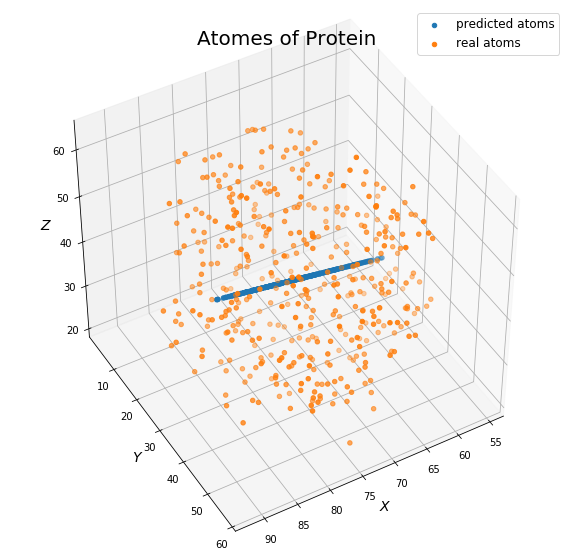

In [12]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pred, Y_pred, Z_pred, label='predicted atoms')
ax.scatter3D(X_real, Y_real, Z_real, label='real atoms')
ax.set_title('Atomes of Protein', fontsize='20')
ax.set_xlabel('$X$', fontsize='14')
ax.set_ylabel('$Y$', fontsize='14')
ax.set_zlabel('$Z$', fontsize='14')
ax.legend(fontsize='12')
ax.view_init(elev=45, azim=60)